In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta

In [2]:
from utils import *

2024-05-02 08:41:53.627 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-05-02 08:41:53.631 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [3]:
data = pd.read_csv('clean.csv')

In [4]:
data

,date,AQI,latitude,longitude
0,2023-04-01 00:00:00,45.765,27.889417,71.375264
1,2023-04-01 01:00:00,46.520,27.889417,71.375264
2,2023-04-01 02:00:00,47.640,27.889417,71.375264
3,2023-04-01 03:00:00,49.330,27.889417,71.375264
4,2023-04-01 04:00:00,51.210,27.889417,71.375264
...,...,...,...,...
9236,2024-04-19 20:00:00,64.075,27.889417,71.375264
9237,2024-04-19 21:00:00,64.950,27.889417,71.375264
9238,2024-04-19 22:00:00,63.735,27.889417,71.375264
9239,2024-04-19 23:00:00,61.845,27.889417,71.375264


In [5]:
today=get_today_date()
pd.to_datetime(today)

Timestamp('2024-05-02 00:00:00')

In [6]:
today = date.today()
last_week = today - timedelta(days = 7)
dates = [last_week + timedelta(days=i) for i in range(7)]
string_format = "%Y-%m-%d"
# Convert dates to strings using list comprehension
next_week_strings = [date.strftime(string_format) for date in dates]

In [7]:
days_dt = [pd.to_datetime(date) for date in next_week_strings]
days_dt

[Timestamp('2024-04-25 00:00:00'),
 Timestamp('2024-04-26 00:00:00'),
 Timestamp('2024-04-27 00:00:00'),
 Timestamp('2024-04-28 00:00:00'),
 Timestamp('2024-04-29 00:00:00'),
 Timestamp('2024-04-30 00:00:00'),
 Timestamp('2024-05-01 00:00:00')]

In [8]:
def create_hourly_increments(date):
  return pd.date_range(start=date, periods=24, freq='H')



In [9]:
hourly_dataframes = []
for date in days_dt:
    hourly_df = pd.DataFrame({'date': create_hourly_increments(date)}) 
    hourly_dataframes.append(hourly_df)

# Concatenate all DataFrames into a single DataFrame
all_hours_df = pd.concat(hourly_dataframes, ignore_index=True)

In [10]:
data

,date,AQI,latitude,longitude
0,2023-04-01 00:00:00,45.765,27.889417,71.375264
1,2023-04-01 01:00:00,46.520,27.889417,71.375264
2,2023-04-01 02:00:00,47.640,27.889417,71.375264
3,2023-04-01 03:00:00,49.330,27.889417,71.375264
4,2023-04-01 04:00:00,51.210,27.889417,71.375264
...,...,...,...,...
9236,2024-04-19 20:00:00,64.075,27.889417,71.375264
9237,2024-04-19 21:00:00,64.950,27.889417,71.375264
9238,2024-04-19 22:00:00,63.735,27.889417,71.375264
9239,2024-04-19 23:00:00,61.845,27.889417,71.375264


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9241 entries, 0 to 9240
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       9241 non-null   object 
 1   AQI        9241 non-null   float64
 2   latitude   9241 non-null   float64
 3   longitude  9241 non-null   float64
dtypes: float64(3), object(1)
memory usage: 288.9+ KB


In [12]:
data[data['date'] > '2024-04-17 00:00:00']

,date,AQI,latitude,longitude
9169,2024-04-17 01:00:00,54.995,27.889417,71.375264
9170,2024-04-17 02:00:00,54.990,27.889417,71.375264
9171,2024-04-17 03:00:00,56.955,27.889417,71.375264
9172,2024-04-17 04:00:00,59.580,27.889417,71.375264
9173,2024-04-17 05:00:00,62.900,27.889417,71.375264
...,...,...,...,...
9236,2024-04-19 20:00:00,64.075,27.889417,71.375264
9237,2024-04-19 21:00:00,64.950,27.889417,71.375264
9238,2024-04-19 22:00:00,63.735,27.889417,71.375264
9239,2024-04-19 23:00:00,61.845,27.889417,71.375264


In [13]:
all_hours_df

,date
0,2024-04-25 00:00:00
1,2024-04-25 01:00:00
2,2024-04-25 02:00:00
3,2024-04-25 03:00:00
4,2024-04-25 04:00:00
...,...
163,2024-05-01 19:00:00
164,2024-05-01 20:00:00
165,2024-05-01 21:00:00
166,2024-05-01 22:00:00


In [14]:
data_ = data[data['date'].isin(all_hours_df['date'].astype(str).values.tolist())]
data_

,date,AQI,latitude,longitude


In [15]:
today = date.today()
def past_week_model_data():
    last_week = today - timedelta(days = 7)
    dates = [last_week + timedelta(days=i) for i in range(7)]
    string_format = "%Y-%m-%d"
    # Convert dates to strings using list comprehension
    next_week_strings = [date.strftime(string_format) for date in dates]
    days_dt = [pd.to_datetime(date) for date in next_week_strings]

    # Create a list of DataFrames, each containing hourly increments for a date
    hourly_dataframes = []
    for date in days_dt:
        hourly_df = pd.DataFrame({'date': create_hourly_increments(date)}) 
        hourly_dataframes.append(hourly_df)

    # Concatenate all DataFrames into a single DataFrame
    all_hours_df = pd.concat(hourly_dataframes, ignore_index=True)  
    dates_ = all_hours_df['date'].astype(str).values.tolist()
    # now gwtting from the data
    data_ = data[data['date'].isin(all_hours_df['date'].astype(str).values.tolist())]
    # return the AQI column
    out = data_['AQI'].values
    # extending by adding zeros to make it 168
    out = np.append(out, np.zeros(168 - len(out)))

    # creating a dataframe with the date and the AQI
    out = pd.DataFrame({'date': dates_, 'AQI': out})
    return out

data1 = past_week_model_data()
data1

,date,AQI
0,2024-04-25 00:00:00,0.0
1,2024-04-25 01:00:00,0.0
2,2024-04-25 02:00:00,0.0
3,2024-04-25 03:00:00,0.0
4,2024-04-25 04:00:00,0.0
...,...,...
163,2024-05-01 19:00:00,0.0
164,2024-05-01 20:00:00,0.0
165,2024-05-01 21:00:00,0.0
166,2024-05-01 22:00:00,0.0


In [16]:
def today():
    return date.today()

def next_week_dates():
    next = today() + timedelta(days=7)
    dates = [next + timedelta(days=i) for i in range(7)]
    string_format = "%Y-%m-%d"
    next_week_strings = [date.strftime(string_format) for date in dates]
    days_dt = [pd.to_datetime(date) for date in next_week_strings]

    hourly_dataframes = []
    for date in days_dt:
        hourly_df = pd.DataFrame({'date': create_hourly_increments(date)})
        hourly_dataframes.append(hourly_df)

    all_hours_df = pd.concat(hourly_dataframes, ignore_index=True)
    return all_hours_df  # Return the DataFrame with hourly data

data = next_week_dates()
data

,date
0,2024-05-09 00:00:00
1,2024-05-09 01:00:00
2,2024-05-09 02:00:00
3,2024-05-09 03:00:00
4,2024-05-09 04:00:00
...,...
163,2024-05-15 19:00:00
164,2024-05-15 20:00:00
165,2024-05-15 21:00:00
166,2024-05-15 22:00:00


In [17]:
d = get_date_data('2024-05-17')
d

2024-05-02 08:41:55.186 
  command:

    streamlit run c:\Users\timmy\Downloads\Rameen-Fiverr\venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-05-02 08:41:55.193 No runtime found, using MemoryCacheStorageManager


,date,AQI,latitude,longitude


<Axes: >

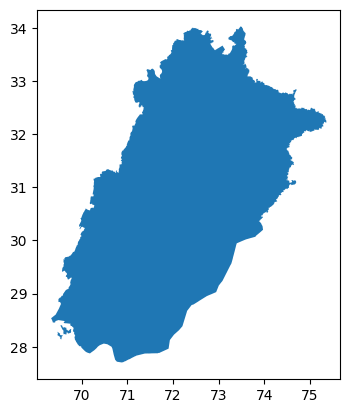

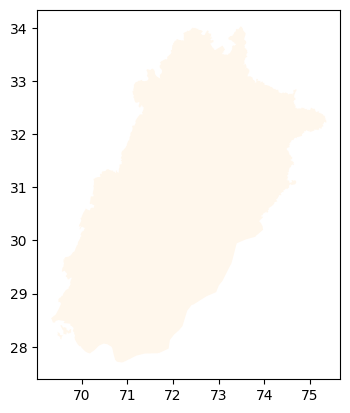

In [18]:
import geopandas as gpd

# Specify the path to your shapefile (including .shp extension)
shp_filepath = "punjabaoi/aoi_punjab.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shp_filepath)

# Simple plot using GeoPandas plotting methods
gdf.plot()  # Basic plot with default styling
gdf.plot(cmap="OrRd")  # Plot with color based on a column and colormap


In [19]:
# import folium
# from folium.features import GeoJson

# # Load your shapefile
# gdf = gpd.read_file('punjabaoi/aoi_punjab.shp')

# # Calculate average centroid coordinates
# center_x = 31.1471
# center_y = 75.3412

# # Create the Folium map (consider using basemap like 'Stamen.Toner')
# m = folium.Map(location=[center_x, center_y], zoom_start=7)

# # Define a style function for a transparent fill (optional, adjust opacity if needed)
# def style_function(feature):
#   return {
#     'fillColor': 'none',  # Transparent fill
#     'weight': 2,          # Adjust border weight
#     'color': 'red',       # Set border color (optional)
#     'opacity': 0.4        # Adjust border opacity (optional)
#   }

# # Add GeoJSON layer as an overlay with the style function
# folium.GeoJson(data=gdf.to_json(), name='My Shapefile', style_function=style_function, overlay=True).add_to(m)

# # Display the map
# m


## Extra analysis

In [20]:
# function to get the current hour of the day 
def get_current_hour():
    return datetime.datetime.now().hour

# function to get the current date
def get_current_date():
    return datetime.datetime.now().date()

print(get_current_hour())
print(get_current_date())

8
2024-05-02


In [26]:
from tools import *

c:\Users\timmy\Downloads\Rameen-Fiverr\venv\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [24]:
# predicting for thr last seven days
def predict_last_seven_days():
    # getting the data
    data = pd.read_csv('clean.csv')
    # converting date to the right format
    data['date'] = pd.to_datetime(data['date'])
    # today's date
    today_date = date.today()
    # last seven days
    last_seven_days = today_date - timedelta(days=7)
    # converting to datetime
    today_date = pd.to_datetime(today_date)
    last_seven_days = pd.to_datetime(last_seven_days)
    # caalculating the hours difference
    hours_diff = (today_date - last_seven_days).days * 24
    # the prev day before the last seven days data
    previous_day_hrs = hours_diff + 24 
    # getting the data
    aqi_data = data['AQI'].values.tolist()[-previous_day_hrs:-hours_diff]
    # loading model
    model = load_model()
    # loading scalers
    data_scaler = joblib.load('data_scaler.pkl')
    target_scaler = joblib.load('target_scaler.pkl')
    # lookback
    lookback = 7
    # current data
    current_data = aqi_data[-lookback:]
    # predictions
    predictions = []
    # loop to make predictions
    for _ in range(hours_diff):
        if len(current_data) != lookback:
            raise ValueError(f"Current data must have length {lookback}")

        current_data_np = np.array([current_data])
        scaled_data = data_scaler.transform(current_data_np)
        X = scaled_data.reshape((1, lookback, 1))
        X_ = torch.tensor(X).float().to(device)

        with torch.no_grad():
            y_pred = model(X_)

        predicted_value = target_scaler.inverse_transform(y_pred.cpu().detach().numpy())[0][0]

        current_data.append(predicted_value)
        current_data = current_data[-lookback:]

        predictions.append(predicted_value)

    return predictions[-24*7:]

In [99]:
today = date.today()
data = pd.read_csv('clean.csv')
# getting the data
past_week_data = past_week_model_data()
past_week_data['date'] = pd.to_datetime(past_week_data['date'])
past_week_data['date'] = past_week_data['date'].astype(str)
past_week_data_ = past_week_data['AQI'] 
# getting the forecast
forecast = predict_last_seven_days()
# plotting the data and forecast together
# using a dataframe to add themtogether
d1 = pd.DataFrame()
d1['past_week'] = past_week_data_
d1.index = past_week_data['date']
# opening predicted
pred = pd.read_csv('prediction.csv')
pred.columns = ['date', 'AQI']
pred['date'] = pd.to_datetime(pred['date'])
pred['date'] = pred['date'].astype(str)
# getting the similar dates
pred_1 = pred[pred['date'].isin(past_week_data['date'].values.tolist())].reset_index(drop=True)
pred_1.index = pred_1['date']
# adding the forecast to the dataframe
d1['AQI'] = pred_1['AQI']


c:\Users\timmy\Downloads\Rameen-Fiverr\venv\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [100]:
d1

,past_week,AQI
date,,
2024-04-25 00:00:00,0.0,64.4215
2024-04-25 01:00:00,0.0,65.2614
2024-04-25 02:00:00,0.0,66.6739
2024-04-25 03:00:00,0.0,66.5448
2024-04-25 04:00:00,0.0,66.7585
...,...,...
2024-05-01 19:00:00,0.0,63.8342
2024-05-01 20:00:00,0.0,66.2242
2024-05-01 21:00:00,0.0,68.9567


In [109]:
nxt_hrs = next_week_dates_()
nxt_hrs['date'] = pd.to_datetime(nxt_hrs['date'])
nxt_hrs['date'] = nxt_hrs['date'].astype(str)
d1 = pd.DataFrame()
pred = pd.read_csv('prediction.csv')
pred.columns = ['date', 'AQI']
pred['date'] = pd.to_datetime(pred['date'])
pred['date'] = pred['date'].astype(str)
# getting the similar dates
pred_1 = pred[pred['date'].isin(nxt_hrs['date'].values.tolist())]
pred_1.index = pred_1['date']
d1.index = pred_1['date']
# adding the forecast to the dataframe
d1['AQI'] = pred_1['AQI']


In [ ]:
d1

In [115]:
def create_hourly_increments(date):
  return pd.date_range(start=date, periods=24, freq='H')

today_date = date.today()
create_hourly_increments(today_date).astype(str)

Index(['2024-05-02 00:00:00', '2024-05-02 01:00:00', '2024-05-02 02:00:00',
       '2024-05-02 03:00:00', '2024-05-02 04:00:00', '2024-05-02 05:00:00',
       '2024-05-02 06:00:00', '2024-05-02 07:00:00', '2024-05-02 08:00:00',
       '2024-05-02 09:00:00', '2024-05-02 10:00:00', '2024-05-02 11:00:00',
       '2024-05-02 12:00:00', '2024-05-02 13:00:00', '2024-05-02 14:00:00',
       '2024-05-02 15:00:00', '2024-05-02 16:00:00', '2024-05-02 17:00:00',
       '2024-05-02 18:00:00', '2024-05-02 19:00:00', '2024-05-02 20:00:00',
       '2024-05-02 21:00:00', '2024-05-02 22:00:00', '2024-05-02 23:00:00'],
      dtype='object')

In [119]:
today_date = date.today()
def predict_today():
    # loading the database
    data = pd.read_csv('clean.csv')
    # getting today's date
    date = create_hourly_increments(today_date).astype(str).tolist()
    d1 = pd.DataFrame()
    pred = pd.read_csv('prediction.csv')
    pred.columns = ['date', 'AQI']
    pred['date'] = pd.to_datetime(pred['date'])
    pred['date'] = pred['date'].astype(str)
    pred_1 = pred[pred['date'].isin(date)]
    pred_1.index = pred_1['date']
    d1.index = pred_1['date']
    # adding the forecast to the dataframe
    d1['AQI'] = pred_1['AQI']
    
    # converting both to time and getting the total hours between them
   

    return d1

In [120]:
predict_today()

,AQI
date,
2024-05-02 00:00:00,64.0786
2024-05-02 01:00:00,64.9462
2024-05-02 02:00:00,66.3956
2024-05-02 03:00:00,66.2381
2024-05-02 04:00:00,66.5086
2024-05-02 05:00:00,69.0066
2024-05-02 06:00:00,72.0594
2024-05-02 07:00:00,73.8279
2024-05-02 08:00:00,74.4464
